In [ ]:
!pip install lime
!pip install seaborn
!pip install lifelines

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


number of -1:  0    8054
1    3703
Name: is_recid, dtype: int64
recidivate decision in Os:  0    729
1     25
Name: is_recid, dtype: int64
O's:  O    718
M      1
Name: c_charge_degree, dtype: int64
Sex values as string: Male      9336
Female    2421
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SEX VALUES AS BINARY: 0    9336
1    2421
Name: sex, dtype: int64
CHARGE VALUES AS STRING:  F    7232
M    4525
Name: c_charge_degree, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CHARGE VALUES AS BINARY:  1    7232
0    4525
Name: c_charge_degree, dtype: int64
11757
last date of dataset:  2014-12-31 length of compas:  11757
last date of modified dataset:  2014-03-31 length of compas:  7628
recids and not recids:  0    5005
1    2623
Name: is_recid, dtype: int64
Null values:  False Sum:  sex                0
age                0
juv_fel_count      0
juv_misd_count     0
priors_count       0
c_charge_degree    0
dtype: int64
7628
MEAN OF SCALED DATA:  [ 2.42188138e-17 -1.60216768e-16 -1.21094069e-17  1.39723925e-18
 -1.02464212e-17 -2.37530673e-17]
STANDARD DEVIATION OF SCALED DATA [1. 1. 1. 1. 1. 1.]
7628
Null values:  False Sum:  sex                0
age                0
juv_fel_count      0
juv_misd_count     0
priors_count       0
c_charge_degree    0
dtype: int64
[70.31, 69.66, 70.05, 69.72, 69.0, 70.51, 68.81, 68.22, 68.09, 68.15, 68.55, 68.68, 69.0, 69.4, 69.53, 68.81, 69.99, 69.92, 68.41, 69.92, 67.96, 70.25, 67.76, 67.82, 69.46, 68.35, 71.04, 68.15, 68.2

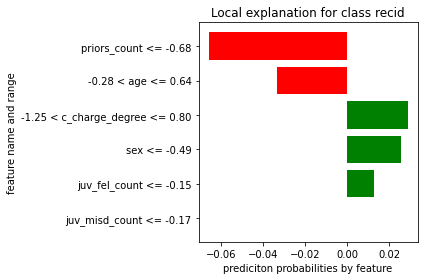

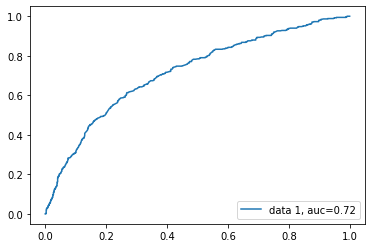

Mean validation accuracy/loss:  69.36643000000001 stddev:  1.062376559935318 Confidence Interval:  0.0658467813785318


In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from lime.lime_text import LimeTextExplainer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.feature_extraction 
import seaborn as sns
import pickle
import datetime
from datetime import timedelta
import scipy.stats as st
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

compas = pd.read_csv("compas-scores.csv")

predict = 'is_recid'
os = []
o = []
total = len(compas)
for i in range(total):
  if compas[predict][i] == -1:
    os.append(compas.iloc[i])
    compas[predict][i] = 0
  if compas["c_charge_degree"][i] == "O":
    o.append(compas.iloc[i])
    compas["c_charge_degree"][i] = 'M'
os = pd.DataFrame(os, columns =['sex','age','race','juv_fel_count','decile_score','juv_misd_count','juv_other_count','priors_count','c_charge_degree','v_decile_score','is_recid'] )
o = pd.DataFrame(o,  columns =['sex','age','race','juv_fel_count','decile_score','juv_misd_count','juv_other_count','priors_count','c_charge_degree','v_decile_score','is_recid'] )
print("number of -1: ", compas["is_recid"].value_counts())
print("recidivate decision in Os: ", o["is_recid"].value_counts())
print("O's: ", os["c_charge_degree"].value_counts())
#Encode sex values
print("Sex values as string:", compas['sex'].value_counts())
for i in range(total):
  if compas['sex'][i] == 'Male':
    compas['sex'][i] = 0
  if compas['sex'][i] == 'Female':
    compas['sex'][i] = 1
print("SEX VALUES AS BINARY:",compas['sex'].value_counts())
#Encode charge degree values
print("CHARGE VALUES AS STRING: ", compas['c_charge_degree'].value_counts())
for i in range(total):
  if compas['c_charge_degree'][i] == 'M':
    compas['c_charge_degree'][i] = 0
  if compas['c_charge_degree'][i] == 'F':
    compas['c_charge_degree'][i] = 1
print("CHARGE VALUES AS BINARY: ", compas['c_charge_degree'].value_counts())
print(total)
print("last date of dataset: ", compas["compas_screening_date"].max(), "length of compas: ", len(compas))
for i in range(len(compas)):
  if pd.to_datetime(compas["compas_screening_date"][i]) >= datetime.datetime(2014, 4, 1):
    compas = compas.drop([i])
print("last date of modified dataset: ", compas["compas_screening_date"].max(), "length of compas: ", len(compas))
print("recids and not recids: ", compas["is_recid"].value_counts())

compasfeat = compas.drop(['id', 'name', 'first', 'last','race','decile_score', 'juv_other_count','v_decile_score','compas_screening_date','dob', 'age_cat', 'days_b_screening_arrest', 
                          'c_jail_in','c_jail_out','c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas','decile_score.1','vr_case_number','vr_charge_degree', 
                          'vr_offense_date', 'vr_charge_desc','type_of_assessment','score_text', 'r_charge_desc','screening_date', 'v_type_of_assessment', 'v_score_text', 'v_screening_date', 
                          'c_charge_desc','num_r_cases','r_case_number','r_days_from_arrest','r_offense_date','r_jail_in','r_jail_out','num_vr_cases', 'is_recid','r_charge_degree','is_violent_recid'], axis=1)

print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())
print(len(compas))

x = np.array(compasfeat)
y = np.array(compas[predict])

scaler = sklearn.preprocessing.StandardScaler()
x = scaler.fit_transform(x)

epochs= 1000
print("MEAN OF SCALED DATA: ", x.mean(axis=0))
print("STANDARD DEVIATION OF SCALED DATA", x.std(axis=0))
print(len(compasfeat))

print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())

linaccuracies= []

for _ in range(epochs):
  x_train2, x_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(x, y, test_size=.20)

  #build the model
  linear = linear_model.LogisticRegression(max_iter = 400)
  linear.fit(x_train2, y_train2)
  acc = linear.score(x_test2, y_test2)
  acc = round(acc*100, 2)
  linaccuracies.append(acc)


"""#open saved model
openbigdataLinear = pickle.load(open("bigdataLinear.sav", "rb"))"""
#results
bigdataLinear = 'bigdataLinear.sav'
pickle.dump(linear, open(bigdataLinear, 'wb'))

print(linaccuracies)
linmeans = np.mean(linaccuracies, 0)
linstds = np.std(linaccuracies, 0)
linci95 = 1.96*linstds/np.sqrt(epochs)
linear_matrix = confusion_matrix(y_test2, linear.predict(x_test2))


i = 66
explainer = lime.lime_tabular.LimeTabularExplainer(x_train2, mode='classification', feature_names = compasfeat.columns.values, class_names=['no recid', 'recid'], verbose=True, discretize_continuous=True, discretizer='quartile')
print("Logisitic regression classifier accuracy: ",acc, "\nprediction: ", linear.predict(x_test2[i].reshape(1, -1)), "\nPredict probability: ", linear.predict_proba(x_test2[i].reshape(1, -1)), "\nConfusion Matrix:\n", linear_matrix)

print("prisoner information:\n", x_test2[i],y_test2[i])
print("Judges on the features: ", compasfeat.columns)
print("Linear: \n")
exp = explainer.explain_instance(x_test2[i], linear.predict_proba, num_features=len(compasfeat.columns))
#exp.show_in_notebook(show_table=True)
linearimg = exp.as_pyplot_figure()
plt.xlabel('prediciton probabilities by feature')
plt.ylabel('feature name and range')
plt.tight_layout()
linearimg.savefig('bigdatalinearexp', format='pdf',bbox_inches='tight')
plt.show()

y_pred_proba = linear.predict_proba(x_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test2,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test2, y_pred_proba),2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.savefig('bigdataLRAUC.pdf', format='pdf',bbox_inches='tight')
plt.show()

print("Mean validation accuracy/loss: ", linmeans, "stddev: ", linstds, "Confidence Interval: ",linci95)